In [1]:
# Data processing
import iris
import iris.analysis
import iris.coord_categorisation
import warnings
warnings.filterwarnings('ignore', module='iris')
import numpy as np
from pathlib import Path
# Visualization
import cartopy.util
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from copy import copy
plt.rcParams['mathtext.default'] = 'regular'

1|    1 |    0 |  301 |NOx surf emissions                  |
#
1|    1 |    0 |  302 |CH4 surf emissions                  |
#
1|    1 |    0 |  303 |CO surf emissions                   |
#
1|    1 |    0 |  304 |HCHO surf emissions                 |
#
1|    1 |    0 |  305 |C2H6 surf emissions                 |
#
1|    1 |    0 |  306 |C3H8 surf emissions                 |
#
1|    1 |    0 |  307 |ME2CO surf emissions                |
#
1|    1 |    0 |  308 |MECHO surf emissions                |
#
1|    1 |    0 |  309 |C5H8 surf emissions                 |
#
1|    1 |    0 |  310 |MeOH surf emissions                 |

In [44]:
path_to_figs = Path.home() / 'UEA' / 'PhD' / 'results' / 'misc'

In [2]:
path_to_ukca = Path.home() / 'UEA' / 'PhD' / 'models' / 'ukca' / 'raw'
nox = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 301'))
ch4 = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 302'))
co = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 303'))
hcho = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 304'))
c2h6 = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 305'))
c3h8 = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 306'))
me2co = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 307'))
mecho = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 308'))
c5h8 = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 309'))
meoh = iris.load_cube(str(path_to_ukca / 'ar5_emissions_w_c1_c3_rono2_emissions.nc'), iris.AttributeConstraint(title='Stash code = 310'))

In [3]:
nox.coord('t').rename('time')
ch4.coord('t').rename('time')
c2h6.coord('t').rename('time')
c3h8.coord('t').rename('time')
for icb in [nox, ch4, c2h6, c3h8]:    
    iris.coord_categorisation.add_season_year(icb, 'time', name='year')
lons = nox.coord('longitude').points
lats = nox.coord('latitude').points
# Calculate annual mean emissions
nox_ann = nox.collapsed(['year'], iris.analysis.SUM)
ch4_ann = ch4.collapsed(['year'], iris.analysis.SUM)
c2h6_ann = c2h6.collapsed(['year'], iris.analysis.SUM)
c3h8_ann = c3h8.collapsed(['year'], iris.analysis.SUM)
# Mask zero emissions
mskd_nox_ann = np.ma.masked_where(nox_ann.data<=0.0000000e+00, nox_ann.data)
mskd_ch4_ann = np.ma.masked_where(ch4_ann.data<=0.0000000e+00, ch4_ann.data)
mskd_c2h6_ann = np.ma.masked_where(c2h6_ann.data<=0.00000000e+00, c2h6_ann.data)
mskd_c3h8_ann = np.ma.masked_where(c3h8_ann.data<=0.0000000e+00, c3h8_ann.data)
# Add a cyclic point
c_mskd_nox_ann, c_lons = cartopy.util.add_cyclic_point(mskd_nox_ann.data, coord=lons)
c_mskd_ch4_ann, c_lons = cartopy.util.add_cyclic_point(mskd_ch4_ann.data, coord=lons)
c_mskd_c2h6_ann, c_lons = cartopy.util.add_cyclic_point(mskd_c2h6_ann.data, coord=lons)
c_mskd_c3h8_ann, c_lons = cartopy.util.add_cyclic_point(mskd_c3h8_ann.data, coord=lons)

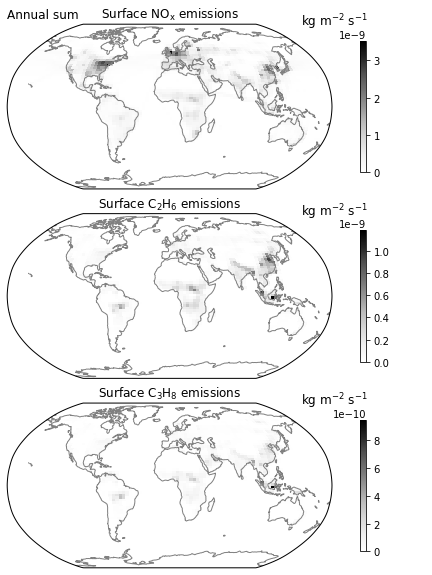

In [48]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10,10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
# Hide zero emissions
cmap_hide = copy(plt.cm.Greys)
cmap_hide.set_bad('w', 0.)
p00 = ax[0].pcolormesh(c_lons, lats, mskd_nox_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
p10 = ax[1].pcolormesh(c_lons, lats, c_mskd_c2h6_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
p11 = ax[2].pcolormesh(c_lons, lats, c_mskd_c3h8_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
# common
ax[0].set_title('Annual sum', loc='left')#, weight='bold')
ax[0].set_title('Surface $NO_x$ emissions')
ax[1].set_title('Surface $C_2H_6$ emissions')
ax[2].set_title('Surface $C_3H_8$ emissions')
for iax in ax.flatten(): iax.coastlines(color='grey') 
cb00 = fig.colorbar(p00, ax=ax[0], orientation='vertical', shrink=0.8)
cb10 = fig.colorbar(p10, ax=ax[1], orientation='vertical', shrink=0.8)
cb11 = fig.colorbar(p11, ax=ax[2], orientation='vertical', shrink=0.8)
cb00.ax.set_title('kg $m^{-2}$ $s^{-1}$                ', pad=15);
cb10.ax.set_title('kg $m^{-2}$ $s^{-1}$                ', pad=15);
cb11.ax.set_title('kg $m^{-2}$ $s^{-1}$                ', pad=15);
fig.subplots_adjust(hspace=0.15)
fig.savefig(path_to_figs / f'nox_c2h6_c3h8_emis_ann.png', bbox_inches='tight', dpi=200)

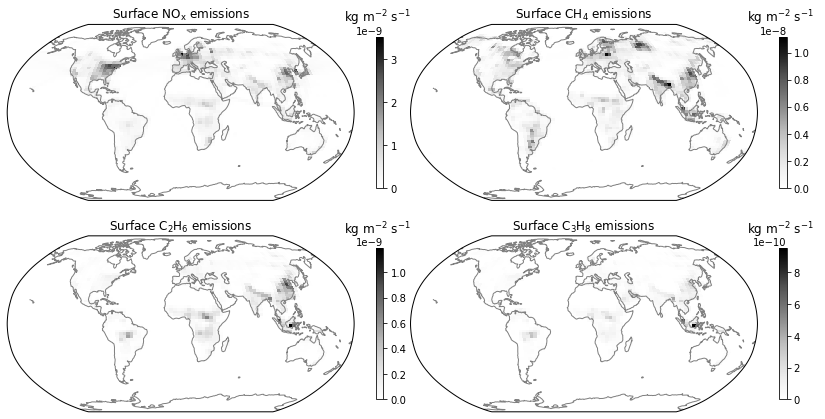

In [20]:
# fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
# # Hide zero emissions
# cmap_hide = copy(plt.cm.Greys)
# cmap_hide.set_bad('w', 0.)
# p00 = ax[0,0].pcolormesh(c_lons, lats, mskd_nox_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
# p01 = ax[0,1].pcolormesh(c_lons, lats, c_mskd_ch4_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
# p10 = ax[1,0].pcolormesh(c_lons, lats, c_mskd_c2h6_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
# p11 = ax[1,1].pcolormesh(c_lons, lats, c_mskd_c3h8_ann.squeeze(), transform=ccrs.PlateCarree(), vmin=0, cmap=cmap_hide);
# # common
# ax[0,0].set_title('Surface $NO_x$ emissions')
# ax[0,1].set_title('Surface $CH_4$ emissions')
# ax[1,0].set_title('Surface $C_2H_6$ emissions')
# ax[1,1].set_title('Surface $C_3H_8$ emissions')
# for iax in ax.flatten(): iax.coastlines(color='grey') 
# cb00 = fig.colorbar(p00, ax=ax[0,0], orientation='vertical', shrink=0.25)
# cb01 = fig.colorbar(p01, ax=ax[0,1], orientation='vertical', shrink=0.25)
# cb10 = fig.colorbar(p10, ax=ax[1,0], orientation='vertical', shrink=0.25)
# cb11 = fig.colorbar(p11, ax=ax[1,1], orientation='vertical', shrink=0.25)
# cb00.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
# cb01.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
# cb10.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);
# cb11.ax.set_title('kg $m^{-2}$ $s^{-1}$  ', pad=15);

# # fig.suptitle('Emissions: annual sum')#, x=0.35, y=0.76)#, weight='bold')
# fig.subplots_adjust(hspace=-0.65, wspace=-0.07)
# # fig.savefig(path_to_figs / f'rono2_oc_bb_emis_ann.png', bbox_inches='tight', dpi=300)